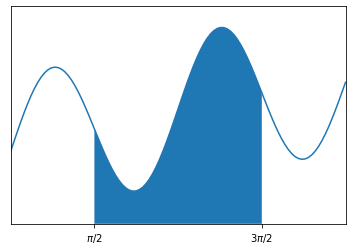

4.957951961393025


In [1]:
#Write integral

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f = lambda x: np.sin(0.2*x) + np.sin(2*x) + 1
a = np.pi/2
b = 3*np.pi/2
n = 100

x = np.linspace(0,2*np.pi,100)
y = f(x)
plt.plot(x,y)

X = np.linspace(np.pi/2,3*np.pi/2,100)
Y = f(X)
plt.fill_between(X,Y)

plt.xticks([np.pi/2,3*np.pi/2],['$\pi/2$','$3\pi/2$']); plt.yticks([]);
plt.xlim([0,2*np.pi]); plt.ylim([0,3]);
plt.show()

result = 0
h = (b - a) / n
  
for i in range(n):
    result += f(a + h * (i + 0.5))

result = result*h
print(result)